# Orbit of the Earth

If we want to solve problems like determine the orbit of planets or the motion of fluids in our ocean or atmosphere, we will need to solve equations that relate the value of some quantity to its rate of change.

Let's see how we can construct the orbit equations that describe the motion of the Earth around the Sun.

We'll start with the force of the Sun's gravity on the Earth, with the symbols as follows:

* $M_\odot$ : the mass of the Sun
* $M_\oplus$ : the mass of the Earth
* $\overrightarrow{r}$ : the vector drawn from the Sun to the Earth with length $r$
* $\hat{r} = \dfrac{\overrightarrow{r}}{r}$ : the unit vector pointing from the Sun to the Earth
* $G$ : Newtons gravitational constant

\begin{equation}
\overrightarrow{F_g} = - \dfrac{G M_\odot M_\oplus}{r^2} \hat{r}
\end{equation}

Now we just need Newton's second law of motion which says the sum of the forces on (e.g. the Earth) is equal to its mass times acceleration.

\begin{equation}
\sum \overrightarrow{F} = m \cdot \overrightarrow{a}
\end{equation}

This lets us write the gravitational acceleration of the Earth as it orbits the Sun:

\begin{equation}
M_\oplus \cdot \overrightarrow{a} = - \dfrac{G M_\odot M_\oplus}{r^2} \hat{r}
\end{equation}

Now to make it easy, let's see what this looks like in $(x,y)$ coordinates where the $x-y$ plane is the orbital plane of the Earth around the Sun.

In those coordinates, we write the acceleration vector as $\overrightarrow{a} = a_x \hat{x} + a_y \hat{y}$ and express the radius in terms of $x$ and $y$ as $r^2 = x^2 + y^2$.

We also have the following relations:

\begin{align}
\hat{r} &= cos(\theta) \hat{x} + sin(\theta) \hat{y} \\
cos(\theta) &= \dfrac{x}{\left(x^2 + y^2\right)^{1/2}} \\
sin(\theta) &= \dfrac{y}{\left(x^2 + y^2\right)^{1/2}}
\end{align}

So after some algebra, Newton's second law gives us two differential equations we need to solve, called the equations of motion:

\begin{align}
\ddot{x} &= -G M_\odot \dfrac{x}{\left(x^2 + y^2\right)^{3/2}} \\
\ddot{x} &= -G M_\odot \dfrac{y}{\left(x^2 + y^2\right)^{3/2}} \\
\end{align}

Recalling that to use numerical solvers we need to write our system of differential equations as $\dot{z} = f(z, t)$, we can rewrite our second order equations of motion as first order equations that we can solve numerically. To do that, we use the following variable substitutions:

\begin{align}
z_0 &= x \\
z_1 &= \dot{x} \\
z_2 &= y \\
z_3 &= \dot{y}
\end{align}

Which lets us rewrite the equations of motion as:

\begin{align}
\dot{z}_0 &= z_1 \\
\dot{z}_1 &= -G M_\odot \dfrac{z_0}{\left(z_0^2 + z_2^2\right)^{3/2}} \\
\dot{z}_2 &= z_3 \\
\dot{z}_3 &= -G M_\odot \dfrac{z_2}{\left(z_0^2 + z_2^2\right)^{3/2}}
\end{align}

All we need to do the integration now is to write down initial conditions for the integration at $t=0$ so the derivatives are defined. Let's take the starting time to be when Earth is at aphelion, its furthest distance from the sun. At that point, the position and speed of the Earth relative to the Sun are:

\begin{align}
z_0(t=0) &= x(0) = 152.10 \times 10^6 \ km = 1.017 \ AU \\
z_1(t=0) &= \dot{x}(0) = 0 \ km/s = 0 \ AU/yr \\
z_2(t=0) &= y(0) = 0 \ km = 0 \ AU \\
z_3(t=0) &= \dot{y}(0) = 29.78 \ km/s = 6.2778 \ AU/yr
\end{align}

In [1]:
# Import some needed libraries
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
# First define a few needed constants in kg, km, seconds
mass_solar = 1.0 # Msun
Grav = 39.42 # AU^3/(Msun yr^2)
GM = Grav*mass_solar

In [3]:
def rhs(t, z):
    f = np.zeros(4)
    f[0] = z[1]
    f[1] = -GM * z[0]/((z[0]**2+z[2]**2)**(3.0/2.0))
    f[2] = z[3]
    f[3] = -GM * z[2]/((z[0]**2+z[2]**2)**(3.0/2.0))
    return f

In [4]:
def doint():
    intvode = ode(rhs).set_integrator('dop853', rtol=1.0e-12, atol=1.0e-12)
    # Initial values at t=0 (aphelion)
    z0 = [1.017, 0.0, 0.0, 6.175]
    t0 = 0.0
    intvode.set_initial_value(z0, t0)
    time_year = 1.0 # units of years
    # Interval at which to save the integration data
    save_dt = 1.0e-3 # units of years
    t    = [0.0]
    x    = [z0[0]]
    dxdt = [z0[1]]
    y    = [z0[2]]
    dydt = [z0[3]]
    next_dt = save_dt
    min_dt = 1.0e-6
    # ierr = 0 (no error), 
    # ierr = 1 (integration reached time_year)
    # ierr = -1 (other error)
    ierr = 0 
    while (intvode.successful()):
        intvode.integrate(intvode.t + next_dt)
        t.append(intvode.t)
        x.append(intvode.y[0])
        dxdt.append(intvode.y[1])
        y.append(intvode.y[2])
        dydt.append(intvode.y[3])
        if intvode.t > time_year:
            break
    t = np.array(t)
    x = np.array(x)
    dxdt = np.array(dxdt)
    y = np.array(y)
    dydt = np.array(dydt)
    if intvode.successful():
        ierr = 0
    else:
        ierr = -1
    return t, x, dxdt, y, dydt, ierr

In [5]:
t, x, dxdt, y, dydt, ierr = doint()

(-1.1, 1.1)

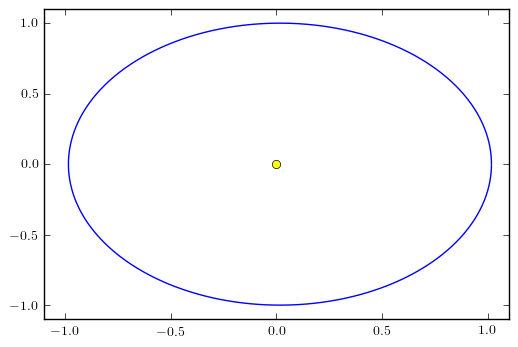

In [6]:
plt.plot(x,y)
plt.plot(0.0, 0.0, marker='o', color='yellow')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

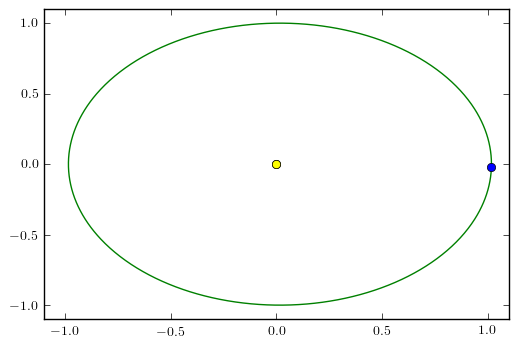

In [10]:
# Let's animate the orbit now ...
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

# Start at the initial point
# z0 = [1.017, 0.0, 0.0, 6.175]
startx = 1.017
starty = 0.0
line, = ax.plot(startx, starty, color='green')
earth, = ax.plot(startx, starty, marker='o', color='blue')

def animate(i):
    # update the data
    line.set_ydata(y[:i])  
    line.set_xdata(x[:i]) 
    earth.set_ydata(y[i-1])
    earth.set_xdata(x[i-1])
    return line, earth

# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(0.0)
    plt.plot(0.0, 0.0, marker='o', color='yellow')
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(t)), init_func=init,
                              interval=25, blit=True)
HTML(anim.to_html5_video())